Pn(1.0384615384615385) = 0.5753931462430032

rn(1.0384615384615385) = 1.328510657672144e-05

Expected deficiency in control points: 2.0105108747907392e-05
Real deficiency on whole interval: 1.329082616186028e-05

Real deficiency in control points: 1.328510657672144e-05


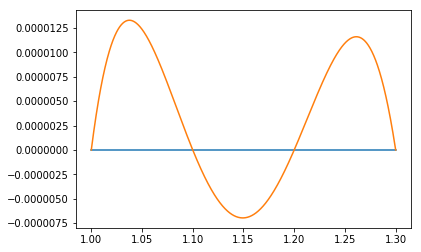

In [2]:
import numpy as np
from math import exp, log, factorial
import matplotlib.pyplot as plt

a = 1.0
b = 1.3
N = 3
delta = (b - a) / N
alpha = 1.7

points = [a + i * delta for i in range(N + 1)]

def f(x):
    return alpha * exp(-x) + (1 - alpha) * log(x)

def fDerivN1(x):
    return (-1) ** (N + 1) * alpha * exp(-x) + (1 - alpha) * ((-1) ** (N)) * factorial(N) / x ** (N + 1)

def maxDerivN1(samples):
    space = np.linspace(a, b, samples)
    return np.max(np.abs(np.array([(fDerivN1(x)) for x in space], dtype=np.double)))

def buildNewtonDiffs(points, f):
    A = np.zeros((N + 1, N + 2), dtype=np.double)
    for i in range(N + 1):
        A[i][0] = points[i]
        A[i][1] = f(points[i])
    for j in range(2, N + 2):
        for i in range(j - 1, N + 1):
            A[i][j] = (A[i][j - 1] - A[i - 1][j - 1]) / (A[i][0] - A[i - j + 1][0])
    return A

def buildDiffs(points, f):
    A = buildNewtonDiffs(points, f)
    return np.array([A[i][i + 1] * factorial(i) * delta ** i for i in range(N + 1)], dtype=np.double)

def prod(i):
    return lambda x: np.prod(np.array([(x - j) for j in range(i)], dtype=np.double))

def getSolution(diffs, points):
    return lambda x: np.sum(np.array([diffs[i] * prod(i)((x - points[0]) / delta) / factorial(i) for i in range(N + 1)],
                                     dtype=np.double))

def deficiency(x, diffs, points):
    t = (x - points[0]) / delta
    return abs(prod(N + 1)(t) * maxDerivN1(10000) * delta ** (N + 1) / factorial(N + 1))

def plotDifference(samples, solution):
    space = np.linspace(a, b, samples)
    plt.plot(space, np.zeros(np.shape(space)))
    plt.plot(space, np.array([solution(x) - f(x) for x in space], dtype=np.double))
    plt.savefig("../TeX/Interpolation/EquallySpacedDiff.png")
    plt.show()

if __name__ == "__main__":
    diffs = buildDiffs(points, f)
    solution = getSolution(diffs, points)
    
    check = [points[0] + delta / 2.6]
    
    [print("Pn({0}) = {1}".format(x, solution(x))) for x in check]
    print()
    
    [print("rn({0}) = {1}".format(x, solution(x) - f(x))) for x in check]
    print()
    
    print("Expected deficiency in control points: " + 
          str(np.max(np.abs(np.array([(deficiency(x, diffs, points)) for x in check], dtype=np.double)))))
    
    space = np.linspace(a, b, 1000)
    print("Real deficiency on whole interval: " + 
          str(np.max(np.abs(np.array([(solution(x) - f(x)) for x in space], dtype=np.double)))))
    print()
    
    print("Real deficiency in control points: " + 
          str(np.max(np.abs(np.array([(solution(x) - f(x)) for x in check], dtype=np.double)))))
    
    plotDifference(1000, solution)